## **4.9 exercise : cleaning data, and creating a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The steps below include a series of changing data types in order to save RAM space & 4.9 part 1 which includes merging the customers & orders/products dataframes.

In [ ]:
#import ords_prods data
ordprodagg = pd.read_csv('/content/drive/My Drive/Prepared Data - Copy/orders_products_aggregated.csv')


In [ ]:
ordprodagg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   product_id              int64  
 2   product_name            object 
 3   aisle_id                int64  
 4   department_id           int64  
 5   prices                  float64
 6   Unnamed: 0_y            int64  
 7   order_id                int64  
 8   user_id                 int64  
 9   eval_set                object 
 10  order_number            int64  
 11  order_dow               int64  
 12  order_military_time     int64  
 13  days_since_prior_order  float64
 14  add_to_cart_order       int64  
 15  reordered               int64  
 16  _merge                  object 
 17  busiest_day             object 
 18  busiest_days            object 
 19  busiest_period_of_day   object 
 20  max_order               int64  
 21  loyalty_flag            objec

In [ ]:
ordprodagg['product_id'] = ordprodagg['product_id'].astype('int32')
ordprodagg['aisle_id'] = ordprodagg['aisle_id'].astype('int32')
ordprodagg['department_id'] = ordprodagg['department_id'].astype('int32')
ordprodagg['order_id'] = ordprodagg['order_id'].astype('int32')
ordprodagg['user_id'] = ordprodagg['user_id'].astype('int32')
ordprodagg['order_number'] = ordprodagg['order_number'].astype('int32')
ordprodagg['order_dow'] = ordprodagg['order_dow'].astype('int32')
ordprodagg['order_military_time'] = ordprodagg['order_military_time'].astype('int32')
ordprodagg['add_to_cart_order'] = ordprodagg['add_to_cart_order'].astype('int32')
ordprodagg['reordered'] = ordprodagg['reordered'].astype('int32')
ordprodagg['max_order'] = ordprodagg['max_order'].astype('int32')
ordprodagg['days_since_prior_order'] = ordprodagg['days_since_prior_order'].astype('float16')
ordprodagg['prices'] = ordprodagg['prices'].astype('float16')
ordprodagg['mean_price'] = ordprodagg['mean_price'].astype('float16')
ordprodagg['median_days'] = ordprodagg['median_days'].astype('float16')
ordprodagg.drop(columns = {'eval_set'}, inplace = True)
ordprodagg.drop(columns = {'_merge'}, inplace = True)
ordprodagg.drop(columns = {'Unnamed: 0'}, inplace = True)






In [ ]:
#import customers data
data = pd.read_csv('/content/drive/My Drive/Prepared Data - Copy/customers.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [ ]:
data.rename(columns = {'STATE' : 'State'}, inplace = True)
data.rename(columns = {'Surname' : 'Last Name'}, inplace = True)
data['Age'] = data['Age'].astype('int32')
data['n_dependants'] = data['n_dependants'].astype('int32')
data['income'] = data['income'].astype('int32')
data['user_id'] = data['user_id'].astype('int32')


In [ ]:
#combine both sets based on the user id
combined = ordprodagg.merge(data, on = 'user_id')

In [ ]:
#check

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int32  
 1   product_name            object 
 2   aisle_id                int32  
 3   department_id           int32  
 4   prices                  float16
 5   Unnamed: 0_y            int64  
 6   order_id                int32  
 7   user_id                 int32  
 8   order_number            int32  
 9   order_dow               int32  
 10  order_military_time     int32  
 11  days_since_prior_order  float16
 12  add_to_cart_order       int32  
 13  reordered               int32  
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int32  
 18  loyalty_flag            object 
 19  mean_price              float16
 20  spending_flag           object 
 21  median_days             float

In [ ]:
#check shape
combined.shape

(32404859, 32)

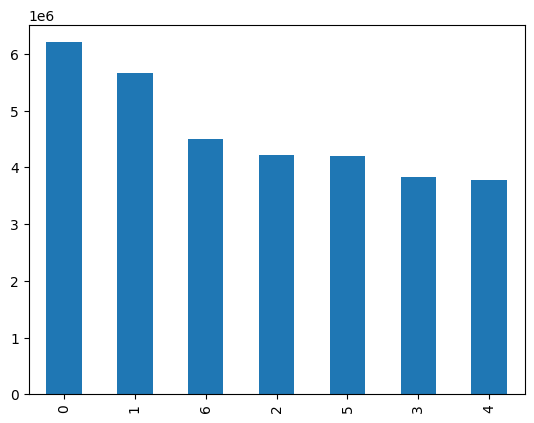

In [ ]:
#question 2 create a barchart 
bar_1 = combined['order_dow'].value_counts().plot.bar()
#from google.colab import files
#plt.savefig("order_dow_value_count.png")
#files.download("order_dow_value_count.png") 

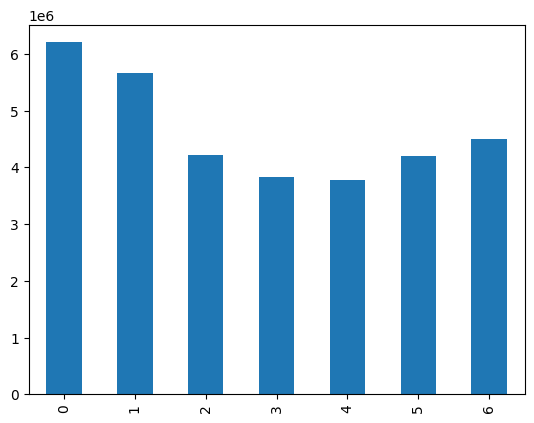

In [ ]:
#question 2 create a barchart 
bar_2 = combined['order_dow'].value_counts().sort_index().plot.bar()
#from google.colab import files
#plt.savefig("order_dow_value_count_sorted.png")
#files.download("order_dow_value_count_sorted.png") 

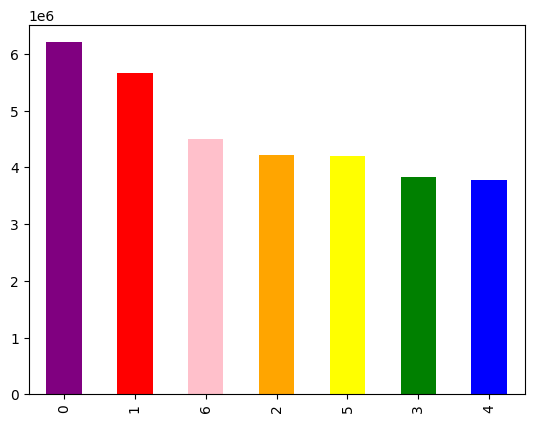

In [ ]:
#question 2 create a bar chart
bar_3 = combined['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
#from google.colab import files
#plt.savefig("order_dow_value_count_color_sorted.png")
#files.download("order_dow_value_count_color_sorted.png") 

In [ ]:
#remove the outlier
combined.loc[combined['prices'] >100, 'prices'] = np.nan

In [ ]:
#check the max now
combined['prices'].max()

25.0

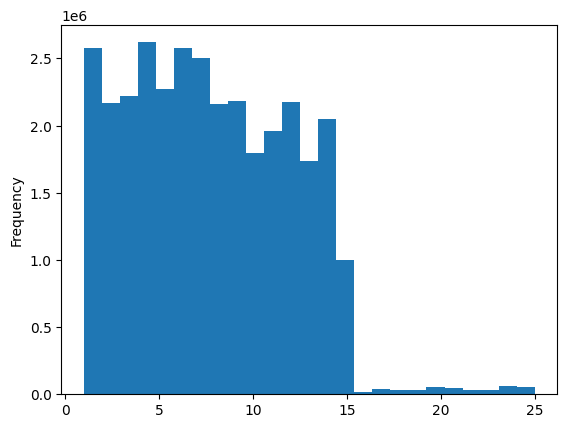

In [ ]:
#question 2 create a histogram with 25 bins
hist_1 = combined['prices'].plot.hist(bins = 25)
#from google.colab import files
#plt.savefig("prices_hist_25_bins.png")
#files.download("prices_hist_25_bins.png") 

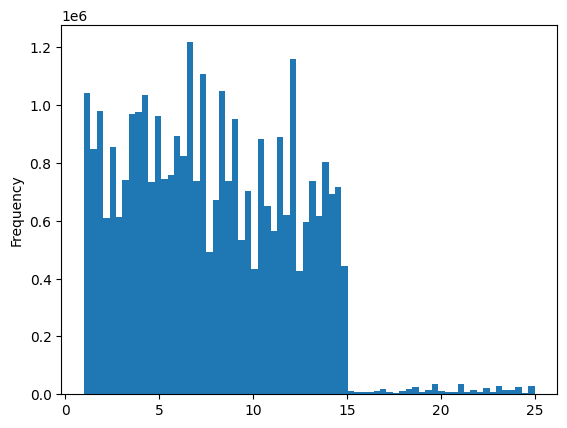

In [ ]:
#create a histogram with 70 bins
hist_2 = combined['prices'].plot.hist(bins = 70)
#from google.colab import files
#plt.savefig("prices_hist_70_bins.png")
#files.download("prices_hist_70_bins.png") 

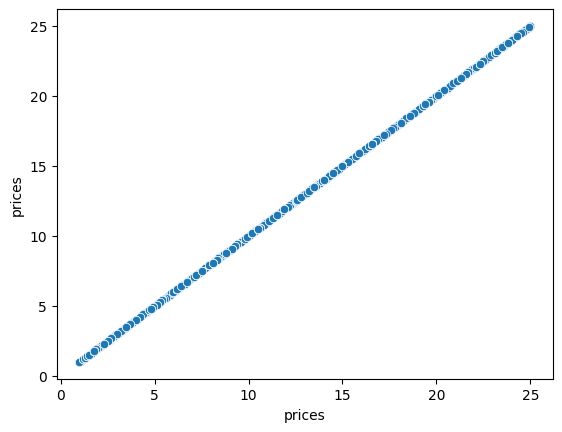

In [ ]:
#question 2 create a scatterplot
scat = sns.scatterplot(x = 'prices', y = 'prices',data = combined)
#from google.colab import files
#plt.savefig("prices_scatterplot.png")
#files.download("prices_scatterplot.png") 

In [ ]:
#create a random sample of the data
np.random.seed(4)
dev = np.random.rand(len(combined)) <= 0.7

In [ ]:
#print this list of boolean values
dev


array([False,  True, False, ...,  True,  True,  True])

In [ ]:
dev.shape

(32404859,)

In [ ]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [ ]:
#storing 70% of the array in the big sample, and 30% in the small sample
big = combined[dev]
small = combined[~dev]

In [ ]:
#confirmation check of the rows
len(big) + len(small)

32404859

In [ ]:
df_2 = small[['order_dow','prices']]

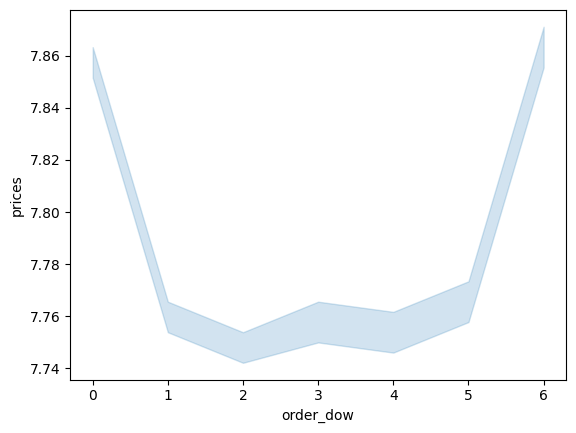

In [ ]:
#create a line chart using the sample subset 
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')
#from google.colab import files
#plt.savefig("prices_dow_line.png")
#files.download("prices_dow_line.png") 

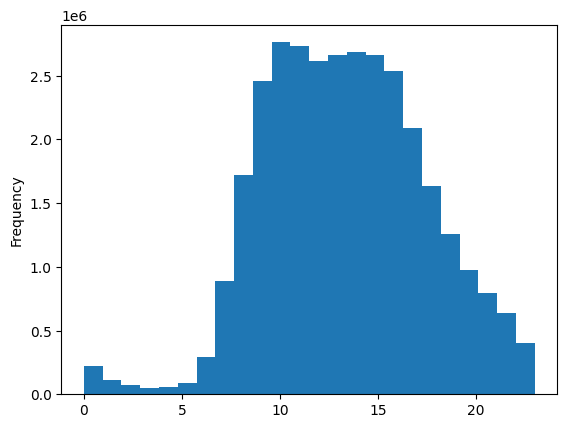

In [ ]:
#question 3 create a histogram re hour of the day, here in military time.
hist_3 = combined['order_military_time'].plot.hist(bins = 24)
#from google.colab import files
#plt.savefig("military_time_bin_24.png")
#files.download("military_time_bin_24.png") 

observation: from about 10:00 to 15:00 is the peak hours of sales.

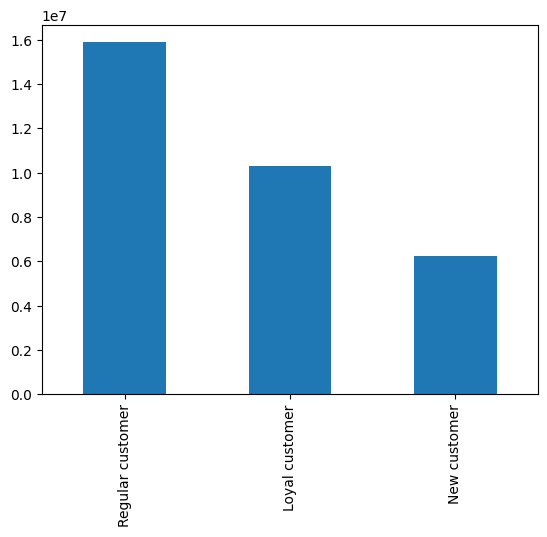

In [ ]:
#question 4 create a bar chart for the loyalty flag
#observation : we have a higher count of regular customers, but a fair amount of loyal customers in comparison to new customers. This is positive for our brand,
bar_4 = combined['loyalty_flag'].value_counts().plot.bar()
#from google.colab import files
#plt.savefig("loyalty_flag_counts_bar.png")
#files.download("loyalty_flag_counts_bar.png") 

In [ ]:
#create a sample for the line chart
df_line = small[['order_military_time', 'prices']]

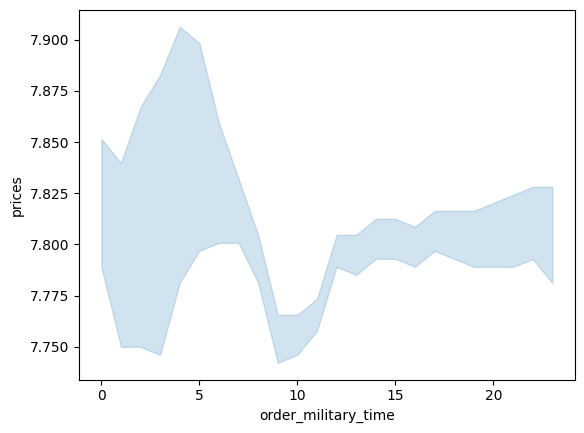

In [ ]:
#question 5 
line_2 = sns.lineplot(data = df_line, x = 'order_military_time', y = 'prices')
#from google.colab import files
#plt.savefig("time_prices_line.png")
#files.download("time_prices_line.png")


observation: 

In [ ]:
#create a subset for age and family situation
df_line_2 = small[['Age', 'n_dependants']]

KeyboardInterrupt: ignored

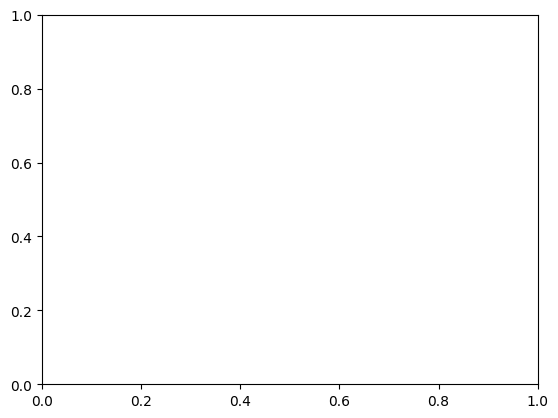

In [ ]:
#question 6 
line_3 = sns.lineplot(data = df_line_2, x = 'Age', y = 'n_dependants')
#from google.colab import files
#plt.savefig("age_dependants.png")
#files.download("age_dependants.png")

observation: There seems to be little to no connection between age and dependants.
The 40s to 50s seems to be the most relatively stable group in terms of dependants when middle aged adults are reliably taking care of their children who are often college aged.
The groups with the most volatility are the 20s, when individuals decide to have children and the 60s, where individuals are retiring and/or being taken care of themselves.

In [ ]:
#question 7
scat_2 = sns.scatterplot(x = 'Age', y = 'income',data = combined)
#from google.colab import files
#plt.savefig("age_income_scatter.png")
#files.download("age_income_scatter.png")

observation: it seems like the age groups of 20-40 have around the same range of income, with an increase at 40 that lasts through the 80s. The majority of individuals however make somewhere around 0 - 200,000. This can be used to identify how to price accordingly per market/audience.

In [ ]:
#export the final data set
from google.colab import files
combined.to_pickle('instacartdataset.pkl') 
files.download('instacartdataset.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>